In [20]:
import seaborn as sns
sns.set_theme(style='darkgrid')
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.DataFrame()
paths = ['40','80','160']
look_ahead = ['2.5 min', '5 min', '10 min']
j=0
for path in paths:
    for i in range(10):
        df_tmp = pd.read_csv('./'+path+'/data_{}.csv'.format(i), names=['average conflict number per two flight hours'])
        df_tmp = df_tmp.loc[0:500]
        df_tmp['episode'] = df_tmp.index
        #df_tmp['action'] = path.replace("_", " ")
        df_tmp['look-ahead time'] = look_ahead[j]
        df = pd.concat([df, df_tmp])
    #if path == 'discrete' or 'speed_and_direction':
    j+=1
df['average conflict number per two flight hours'] = -df['average conflict number per two flight hours']

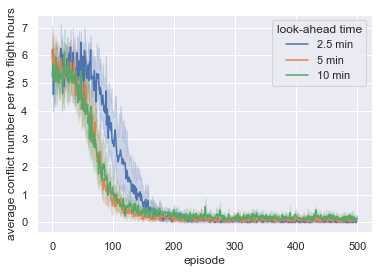

In [26]:
ax = sns.lineplot(x='episode', y='average conflict number per two flight hours', hue='look-ahead time', data=df)

In [27]:
fig = ax.get_figure()
fig.savefig('look-ahead time.png', dpi=200)